In [9]:
%load_ext autoreload
%autoreload 2

import crispr as cr

file_path = {"HH03": {"directory": "data/crispr-screening/HH06"}, 
             "CR4": {"directory": "data/crispr-screening/HH-Hu-CR4"},
             "CR5": {"directory": "data/crispr-screening/HH-Hu-CR5"}}
col_sample_id = "orig.ident"
kws_harmony = {"plot_convergence": True,
               "random_state": 1618}
kws_umap = {"min_dist": 0.3}
kws_process_guide_rna = {"feature_split": "|", "guide_split": "-", 
                         "key_control_patterns": ["CTRL"],
                         "remove_multi_transfected": True}
kws_init = {"assay": None, "assay_protein": None, 
            "col_gene_symbols": "gene_symbols", 
            "col_cell_type": "majority_voting", 
            "col_sample_id": col_sample_id,
            "col_perturbed": "perturbation", 
            "col_guide_rna": "feature_call", 
            "col_num_umis": "num_umis", 
            "kws_process_guide_rna": kws_process_guide_rna,
            "col_condition": "target_gene_name", 
            "key_control": "NT", 
            "key_treatment": "KD"}
kws_pp = {"kws_hvg": {"min_mean": 0.0125, "max_mean": 10, 
                      "min_disp": 0.5, "flavor": "cell_ranger"}, 
          "target_sum": 10000.0, "cell_filter_pmt": [0, 15], 
          "cell_filter_ngene": [200, None], "cell_filter_ncounts": [3, 40000], 
          "gene_filter_ncell": [3, None], "regress_out": None, 
          "kws_scale": "log", "kws_umap": kws_umap}
kws_cluster = {"method_cluster": "leiden", "kws_umap": kws_umap, 
               "kws_neighbors": None, 
               "kws_pca": {"n_comps": None, "use_highly_variable": True}, 
               "kws_cluster": {"resolution": 0.5}}

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Single-Cell Integrated Object Initialization



<<< INITIALIZING CRISPR CLASS OBJECT >>>



<<< INITIALIZING CRISPR CLASS OBJECT >>>


<<< LOADING PROTOSPACER METADATA >>>


Cell Counts: Raw

19226


Gene Counts: Raw



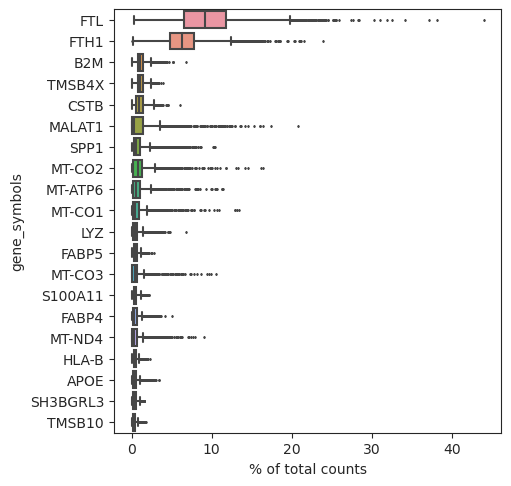


	*** Detecting Mitochondrial, Ribosomal, Hemoglobin genes...

	*** Calculating & plotting QC metrics...




... storing 'feature_call' as categorical
... storing 'num_umis' as categorical
... storing 'feature_types' as categorical


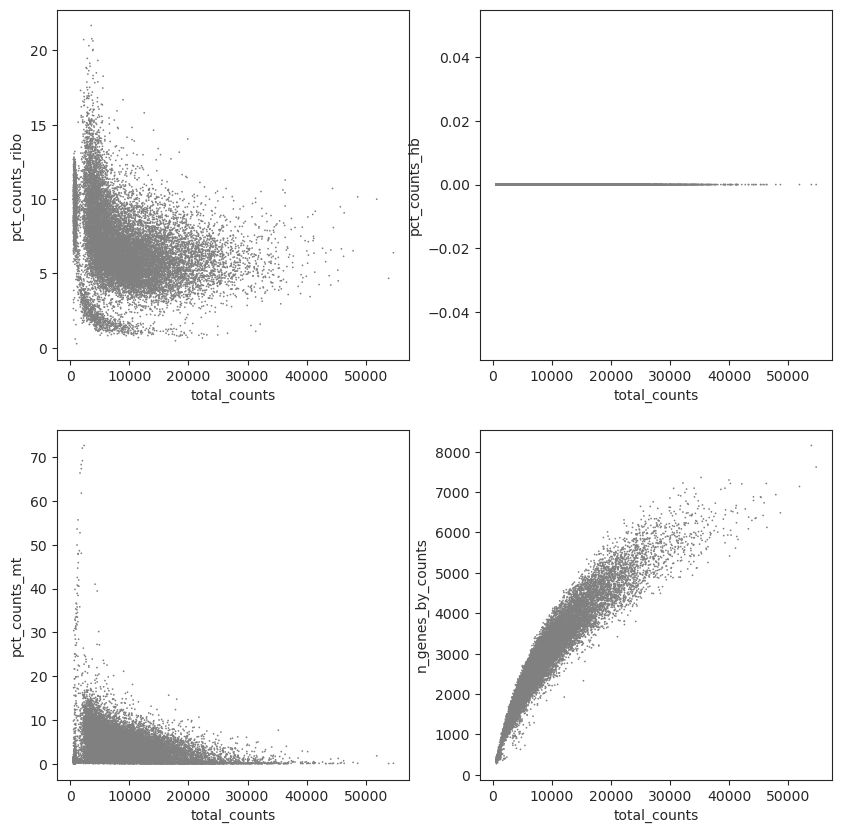

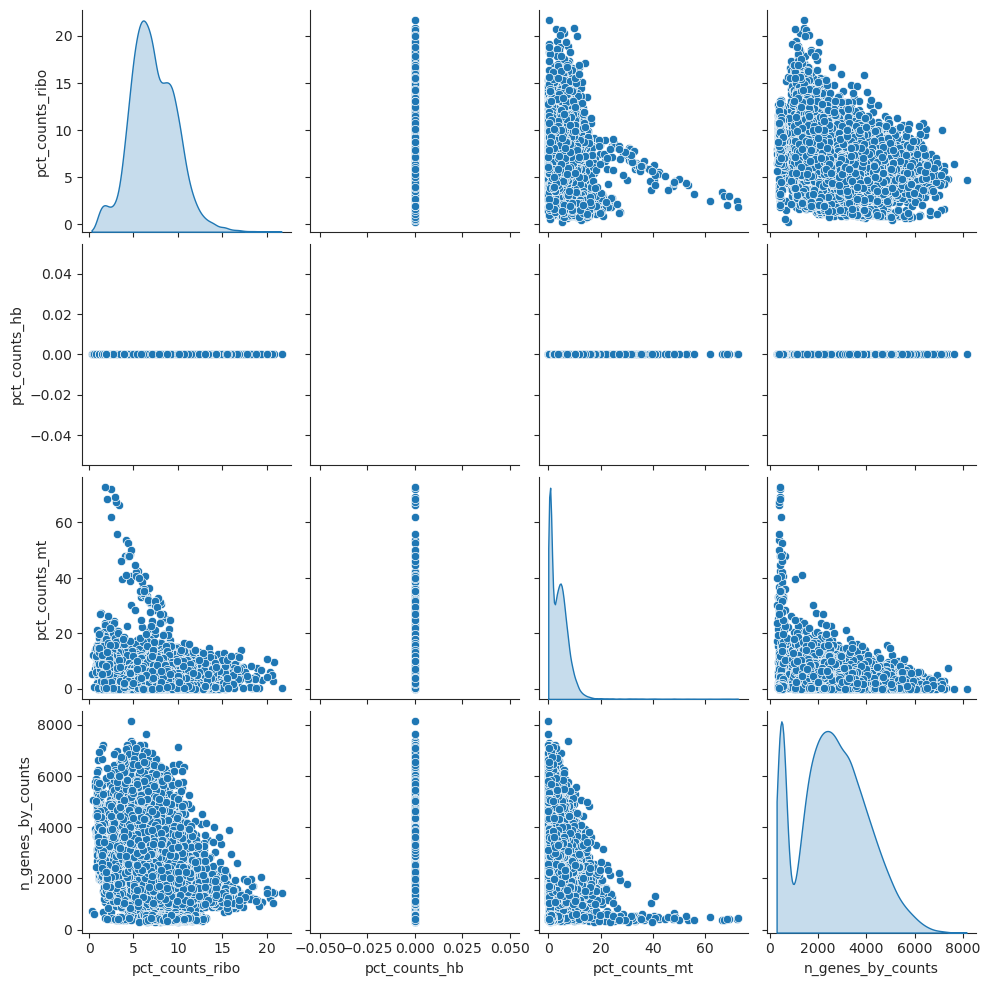

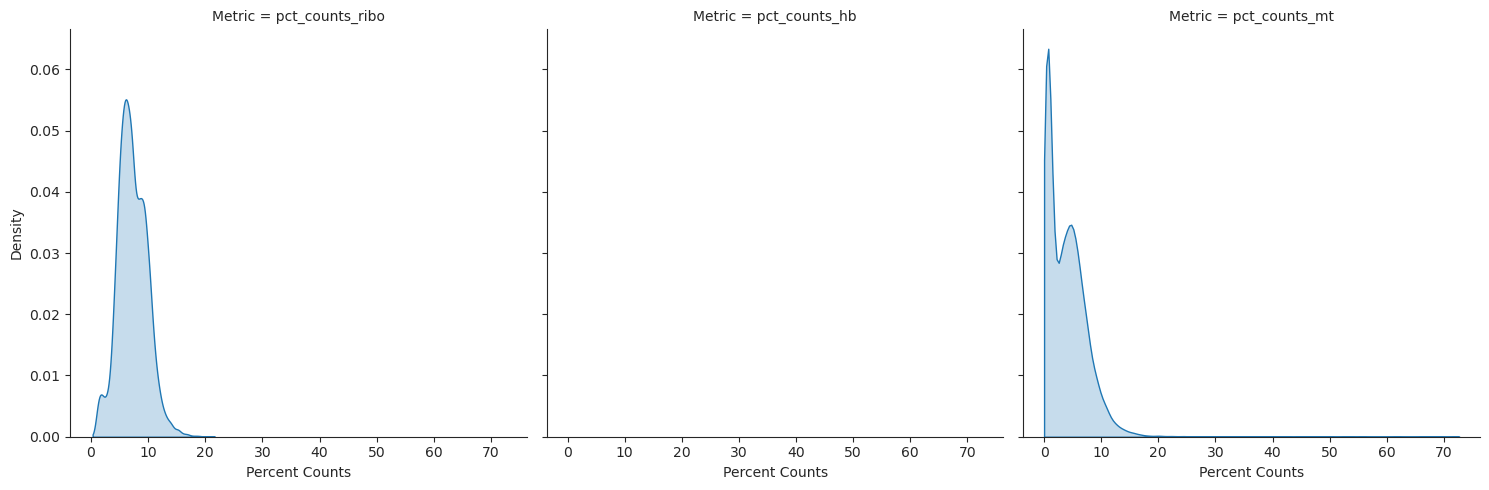

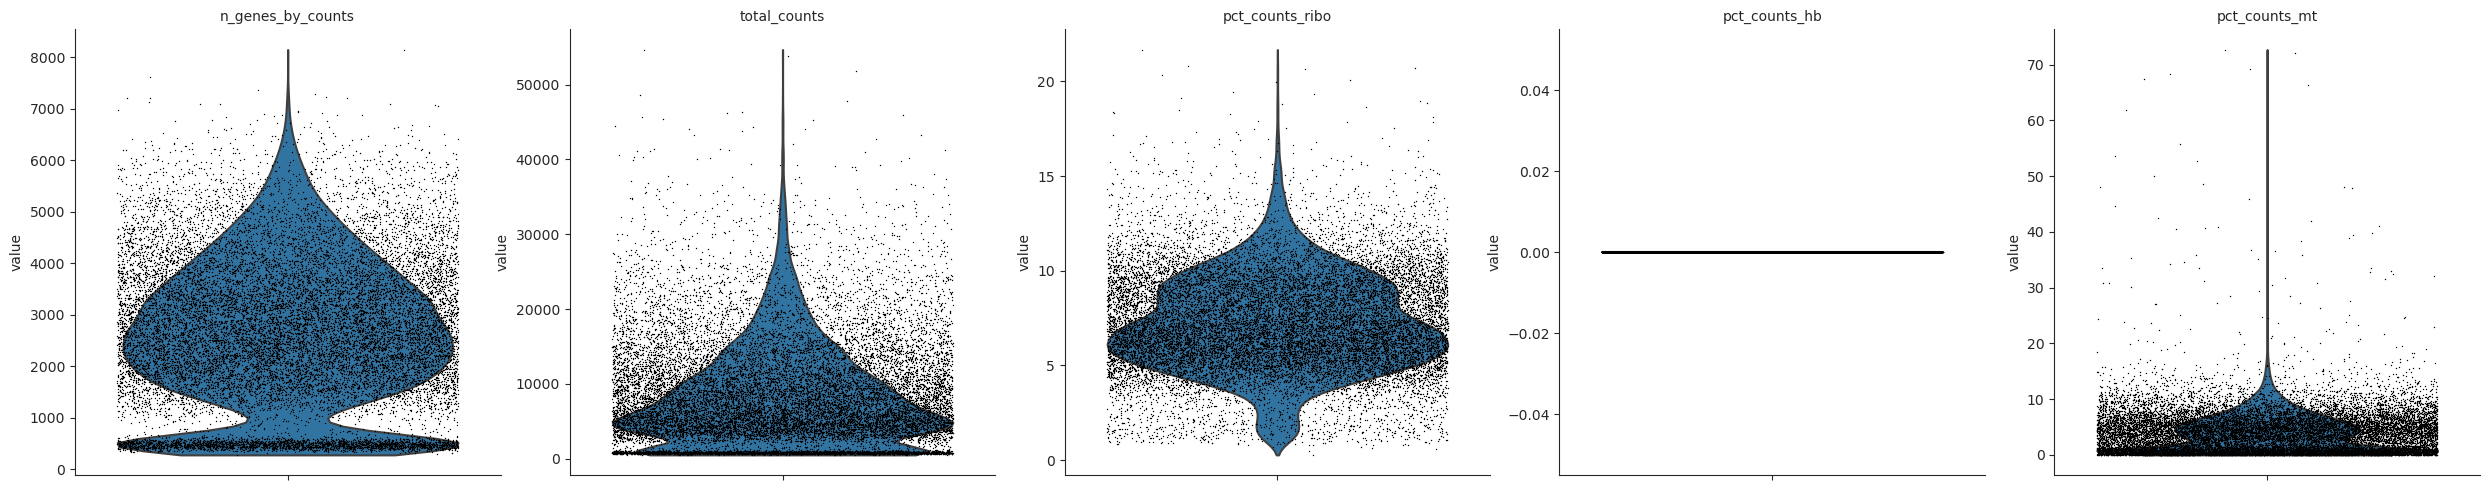

       n_cells_by_counts   mean_counts  log1p_mean_counts  \
count       36601.000000  36601.000000       36601.000000   
mean         1378.291959      0.234447           0.101338   
std          2927.651207      5.301304           0.278060   
min             0.000000      0.000000           0.000000   
25%             0.000000      0.000000           0.000000   
50%            24.000000      0.001248           0.001248   
75%          1125.000000      0.065172           0.063136   
max         19226.000000    803.539062           6.690269   

       pct_dropout_by_counts  total_counts  log1p_total_counts  
count           36601.000000  3.660100e+04        36601.000000  
mean               92.831104  4.507481e+03            3.889242  
std                15.227563  1.019229e+05            3.465176  
min                 0.000000  0.000000e+00            0.000000  
25%                94.148549  0.000000e+00            0.000000  
50%                99.875169  2.400000e+01            3.2188

In [15]:
self = cr.Crispr(file_path, **kws_init, 
                 kws_multi=dict(kws_pp=kws_pp, kws_cluster=kws_cluster, 
                                kws_harmony=kws_harmony))

# Clustering

Use this method to perform dimensionality reduction and clustering on the full sample.

Optionally, by specifying `model_celltypist`, we can also detect cell types using `CellTypist`.

You can see what models are available with this code:
```
import celltypist
celltypist.models.models_description().set_index("model").description.apply(lambda x: print(x))
```

Or it will show you valid models automatically if you feed it an unknown model: `self.cluster(**kws_cluster, model="kate_moss.pkl")``

You can perform this after clustering by leaving `model_celltypist` as None and at any point running `self.annotate_clusters(...)`.

In [ ]:
self.cluster(**kws_cluster, 
             model_celltypist="COVID19_HumanChallenge_Blood.pkl")